In [15]:
import pandas as pd

# EDA

In [16]:
data=pd.read_csv("data.csv")
data.head(5)

,Jassids,RF,Temp Max,Temp Min,RH-I,RH-II,BSS,Wind Velocity
0,0.20,18.87,34.60,24.50,68.82,45.54,6.55,6.48
1,0.23,34.96,33.92,24.19,71.23,48.12,5.25,6.17
2,0.87,29.51,33.10,23.66,73.88,50.89,4.81,6.34
3,1.63,23.64,32.10,23.69,77.48,57.47,4.10,5.73
4,2.38,17.78,31.44,23.81,77.87,59.18,3.58,5.41


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Jassids        58 non-null     float64
 1   RF             58 non-null     float64
 2   Temp Max       58 non-null     float64
 3   Temp Min       58 non-null     float64
 4   RH-I           58 non-null     float64
 5   RH-II          58 non-null     float64
 6   BSS            58 non-null     float64
 7   Wind Velocity  58 non-null     float64
dtypes: float64(8)
memory usage: 3.8 KB


<Axes: >

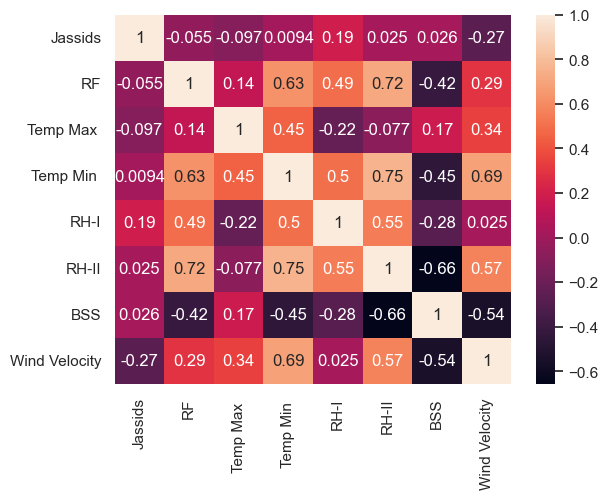

In [18]:
import seaborn as sns
sns.heatmap(data.corr(),annot=True)

In [5]:
data.describe().round(2)

,Jassids,RF,Temp Max,Temp Min,RH-I,RH-II,BSS,Wind Velocity
count,58.00,58.00,58.00,58.00,58.00,58.00,58.00,58.00
mean,3.82,23.25,30.50,20.86,78.45,51.92,6.03,2.73
std,2.33,22.33,1.70,3.69,7.12,11.79,3.20,1.89
min,0.00,0.00,28.00,10.18,63.65,31.25,1.00,0.55
25%,2.24,2.66,29.36,18.66,74.24,40.96,3.80,1.07
50%,4.00,21.96,30.08,22.30,79.38,52.95,5.97,2.20
75%,5.29,32.80,31.24,23.68,84.71,62.71,7.52,4.21
max,8.00,90.30,36.60,26.20,92.80,71.05,20.70,6.55


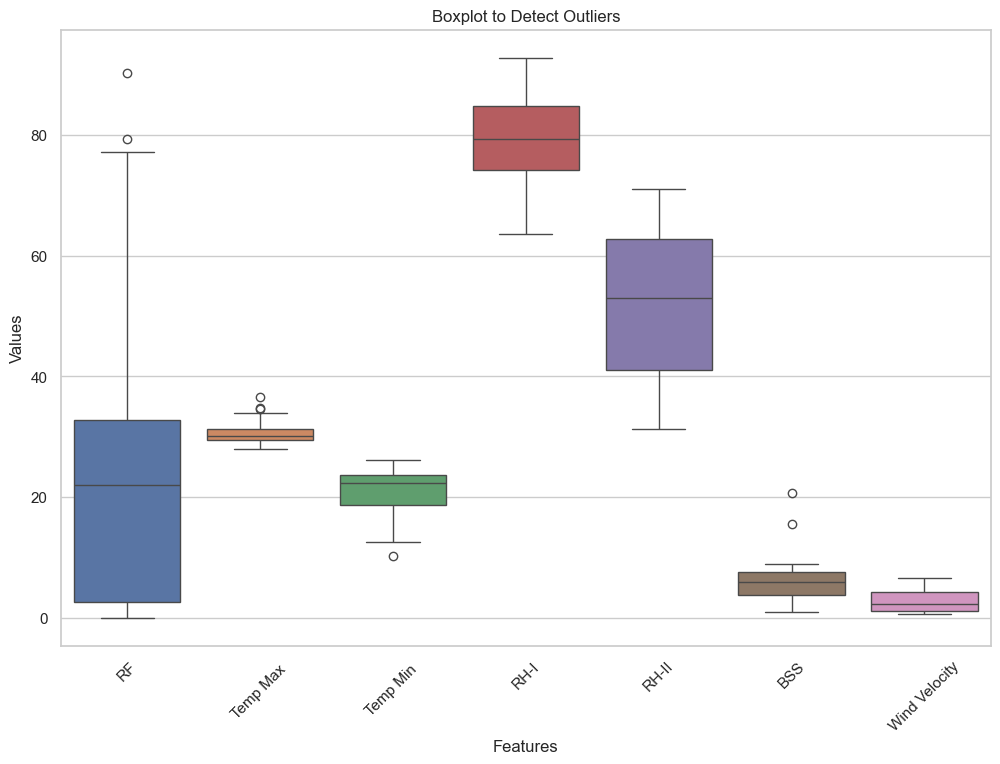

In [6]:
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.boxplot(data=data[['RF', 'Temp Max ', 'Temp Min ', 'RH-I', 'RH-II', 'BSS', 'Wind Velocity']])
plt.title('Boxplot to Detect Outliers')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

# Feature Engineering

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,MinMaxScaler

In [8]:
x=data.drop(["Jassids"],axis=1)
y=data["Jassids"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [9]:
scaler=MinMaxScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [10]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor

In [11]:
models={
    "Linear Regression":LinearRegression(),
    "Random Forest Regression":RandomForestRegressor(),
    "Decision Tree Regression":DecisionTreeRegressor(),
    "Ridge Regression":Ridge(),
    "Lasso Regression":Lasso(),
    "Support Vector Regression":SVR(),
    "XGBoost Regression":XGBRegressor(),
    "KNN Regression":KNeighborsRegressor(),
    "MLP Regression":MLPRegressor()
}

# Results

In [12]:
from sklearn.metrics import r2_score
for name,model in models.items():
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    accuracy=r2_score(y_test,y_pred)
    print(f"{name} :")
    print(accuracy*100)

Linear Regression :
25.825794200765063
Random Forest Regression :
43.99153532767621
Decision Tree Regression :
31.117012301960244
Ridge Regression :
24.900330850401286
Lasso Regression :
-0.15489482011661337
Support Vector Regression :
48.45864891139083
XGBoost Regression :
55.8763521346231
KNN Regression :
42.71292838466577
MLP Regression :
22.857391191997166


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
